#**Light Intensity Monitoring System using LDR ( Light Dependent Resistor ) sensor**
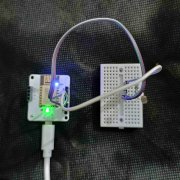 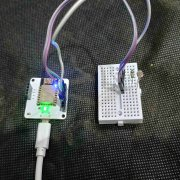

##**Things used in this project**
**Hardware components**
 * Bolt IoT Bolt WiFi Module
 * LDR ( Light Dependent Resistor ) sensor
 * 10k ohm (Brown, Black, Orange) coded Resistor
 * Jumper wires

**Software components**
 * Twilio
 * Python

##**Story**
We all know that plants require sunlight for their healthy growth. However, at times we may not be able to keep a track of it or maybe we are not sure if our plants are getting enough sunlight.

In this project, we will build a system so that we could monitor the light our plants get and send the data to Bolt Cloud. In fact, this product is commercially available by Xiaomi . But as makers, we shall build this product on our own.

##**Gathering all required components**
* Bolt WiFi Module
* LDR ( Light Dependent Resistor ) sensor
* 10k ohm (Brown, Black, Orange) coded Resistor
* Breadboard
* Wires

##**Installing BoltIoT library**

In [ ]:
!pip install boltiot

##**Importing required libraries**

In [ ]:
import json, time
from boltiot import Sms, Bolt

##**Adding credentials of Bolt Module and Twilio Account**

In [ ]:
api_key = "ba0a68fd-fe7a-45d8-8d22-201a3e4ebca7"
device_id = "BOLT6370789"
mybolt = Bolt(api_key,device_id)
SID = "AC4b96f5a3099486e684c8f03afd5c9dac"
auth_token = "f78ad561c20e1958ae1d2e5b84c43e4f"
to_number = "+918601604795"
from_number = "+16592045446"
sms = Sms(SID,auth_token,to_number,from_number)

In [ ]:
split = mybolt.isOnline().split('"')
print(split)

['{', 'value', ': ', 'online', ', ', 'time', ': ', 'Sun 2024-08-18 17:30:51 UTC', ', ', 'success', ': 1}']


##**Light Intensity Monitoring Code**

In [ ]:
if(split[3]=="offline"):
    print("Bolt is offline. Please check connections")
    exit()
else:
  # Deciding Minimum intensity as required for application
  min_limit = float(input("Enter the minimum intensity (not less than 0) : "))

  # Deciding Maximum intensity as required for application
  max_limit = float(input("Enter the maximum intensity (not more than 1024) : "))

  sensor_data = [ ]
  for i in range(10):
    print ("Reading the sensor value")
    response = mybolt.analogRead('A0')
    data = json.loads(response)
    current_time = time.asctime().split(' ')[3]
    if ( data['value'] == 'Device is offline' ):
      print("Device is offline")
      break
    elif ( data['value'] == 'Command timed out' ):
      print("Command timed out")
      break
    else:
      print("Sensor value is: " +data['value'])
      sensor_data.append( [current_time , data['value']] )
      try:
          sensor_value = int(data['value'])
          if ( (sensor_value > max_limit ) or (sensor_value < min_limit) ):
              print("Making request to Twilio to send a SMS")
              response = sms.send_sms("The Current LDR sensor value is " +str(sensor_value))
              print("Response received from Twilio is: " + str(response))
              print("Status of SMS at Twilio is :" + str(response.status))
      except Exception as e:
          print ("Error occured: Below are the details")
          print (e)
      time.sleep(10)

Enter the minimum intensity (not less than 0) : 20
Enter the maximum intensity (not more than 1024) : 1000
Reading the sensor value
Sensor value is: 1009
Making request to Twilio to send a SMS
Response received from Twilio is: <Twilio.Api.V2010.MessageInstance account_sid=AC4b96f5a3099486e684c8f03afd5c9dac sid=SM6d880bef54b33b984c10a2ea2722dc7f>
Status of SMS at Twilio is :queued
Reading the sensor value
Sensor value is: 228
Reading the sensor value
Sensor value is: 628
Reading the sensor value
Sensor value is: 20
Reading the sensor value
Sensor value is: 10
Making request to Twilio to send a SMS
Response received from Twilio is: <Twilio.Api.V2010.MessageInstance account_sid=AC4b96f5a3099486e684c8f03afd5c9dac sid=SM6df90aa363439087cc269a249ae063cc>
Status of SMS at Twilio is :queued
Reading the sensor value
Sensor value is: 1024
Making request to Twilio to send a SMS
Response received from Twilio is: <Twilio.Api.V2010.MessageInstance account_sid=AC4b96f5a3099486e684c8f03afd5c9dac sid=S

##**Readings from sensor**

In [ ]:
sensor_data

[['17:31:42', '1009'],
 ['17:31:58', '228'],
 ['17:32:10', '628'],
 ['17:32:22', '20'],
 ['17:32:34', '10'],
 ['17:32:49', '1024'],
 ['17:33:02', '3'],
 ['17:33:18', '292'],
 ['17:33:33', '0'],
 ['17:33:47', '1024']]

##**Table of Light Intensity**

In [ ]:
import pandas as pd
df = pd.DataFrame(sensor_data,columns=['Time','Light Intensity'])
df

,Time,Light Intensity
0,17:31:42,1009
1,17:31:58,228
2,17:32:10,628
3,17:32:22,20
4,17:32:34,10
5,17:32:49,1024
6,17:33:02,3
7,17:33:18,292
8,17:33:33,0
9,17:33:47,1024


In [ ]:
intensity_array = pd.Series(df['Light Intensity']).astype(int)

##**Plotting the graph**

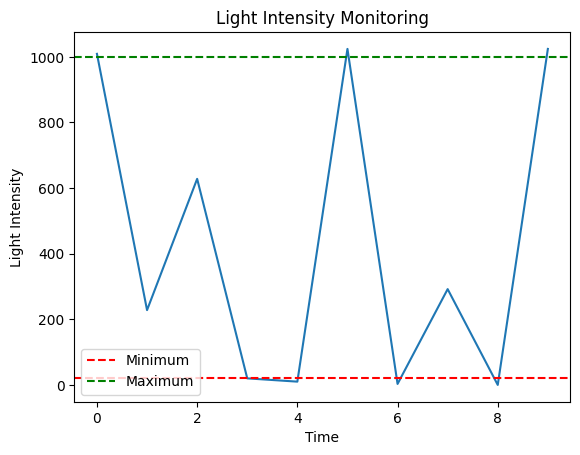

In [82]:
import matplotlib.pyplot as plt

plt.plot(intensity_array)

plt.axhline( y = min_limit, color = 'r', linestyle = '--', label = 'Minimum' )
plt.axhline( y = max_limit, color = 'g', linestyle = '--', label = 'Maximum' )

plt.xlabel('Time')
plt.ylabel('Light Intensity')
plt.title('Light Intensity Monitoring')
plt.legend()

plt.show()

##**Alert on phone through SMS for light intensity (sensor value) greater and less than maximum and minimum intensity (sensor value)**

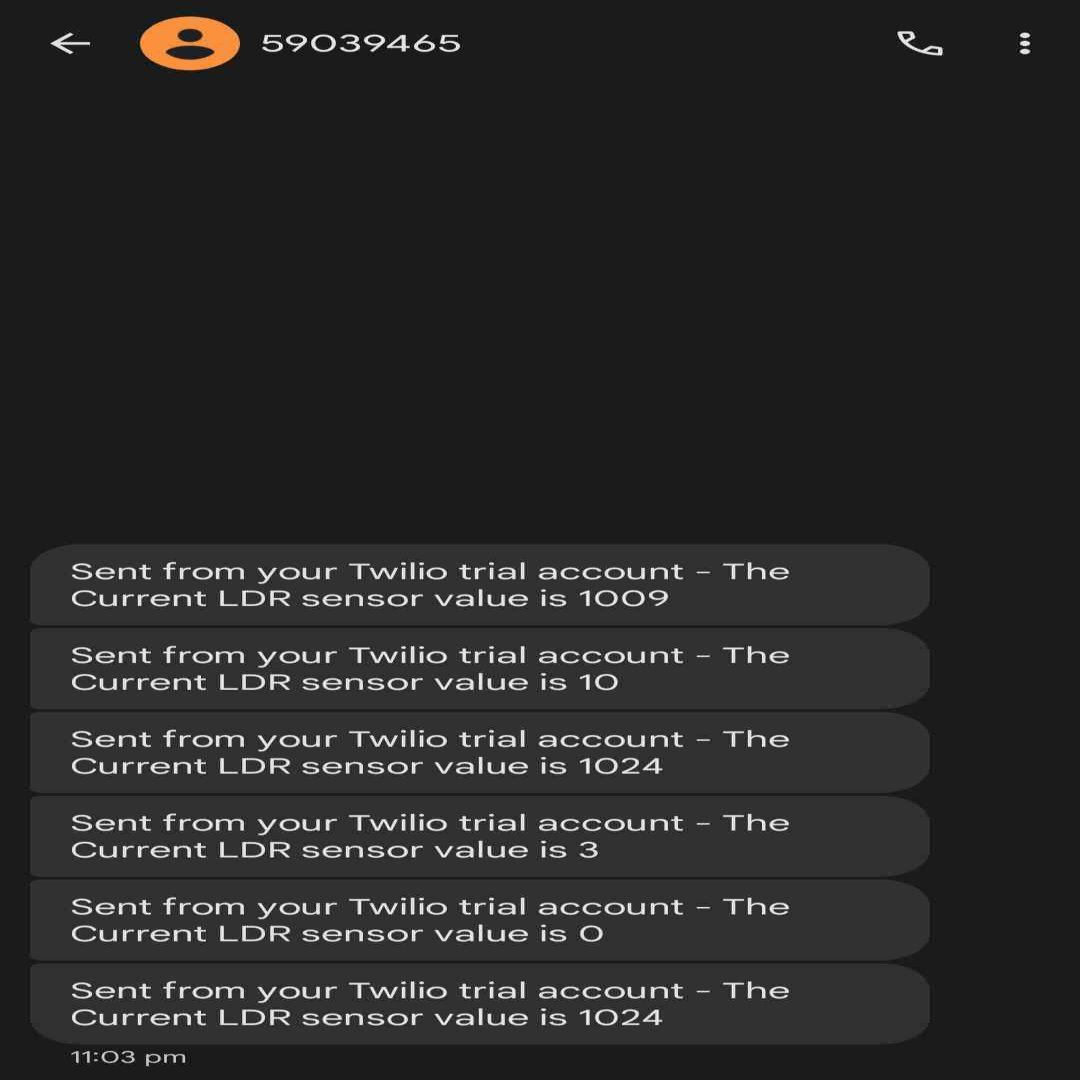